In [598]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats

## Base de dados da Superstore

Transformamos a base de dados em DataFrame do pandas e observamos algumas informações sobre os tipos e estatísticas da base de dados.

In [599]:
Base = pd.read_csv('superstore.csv', encoding= 'unicode_escape')        #Lendo os dados
Base = pd.DataFrame(Base)               #Transformando em DataFrame

In [600]:
Base.info()         #Informações sobre a base. Verificando os tipos dos dados


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [601]:
Base.describe()         #Descrevendo os dados

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


## Histograma

array([[<AxesSubplot: title={'center': 'Row ID'}>,
        <AxesSubplot: title={'center': 'Postal Code'}>,
        <AxesSubplot: title={'center': 'Sales'}>],
       [<AxesSubplot: title={'center': 'Quantity'}>,
        <AxesSubplot: title={'center': 'Discount'}>,
        <AxesSubplot: title={'center': 'Profit'}>],
       [<AxesSubplot: title={'center': 'Shipping Cost'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

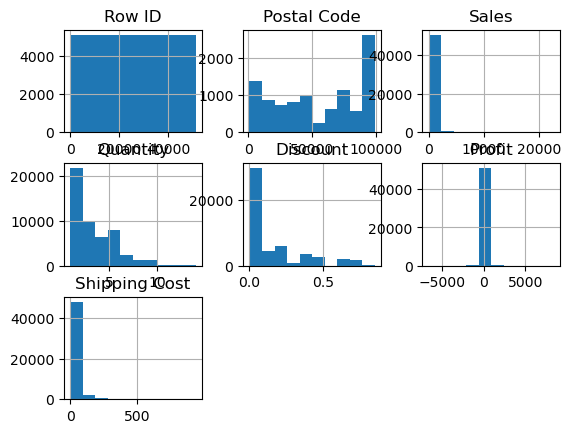

In [602]:
Base.hist()         #Histograma de alguns dados da base

(array([29620.,  5344.,  5625.,   563.,  4333.,  1643.,  2058.,  1786.,
          318.]),
 array([0.        , 0.09444444, 0.18888889, 0.28333333, 0.37777778,
        0.47222222, 0.56666667, 0.66111111, 0.75555556, 0.85      ]),
 <BarContainer object of 9 artists>)

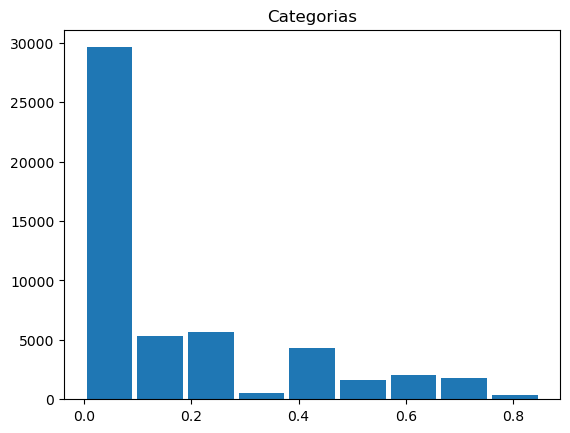

In [603]:
plt.title('Categorias')         #Título do histograma sobre as categorias
plt.hist(Base.Discount,9,rwidth=0.9)        #Criando histograma de categorias

Através dos histogramas é possível ver que na maior parte das vendas (mais de 20.000) foi praticado o preço cheio (0% de desconto). 

(array([31273.,  9876., 10141.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

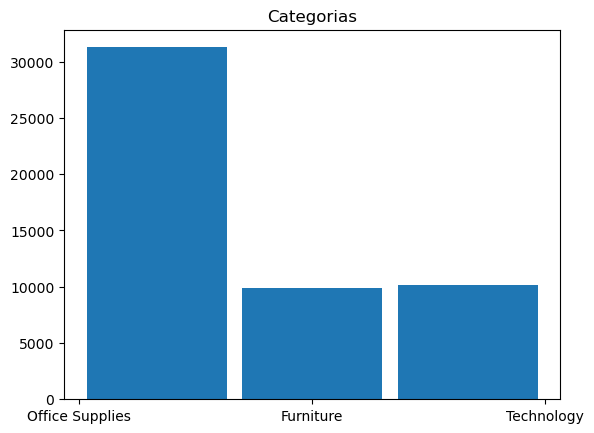

In [604]:
plt.title('Categorias')         #Título do histograma sobre as categorias
plt.hist(Base.Category,3,rwidth=0.9)        #Criando histograma de categorias

Dentre as categorias de produtos vendidos, a maior parte das vendas diziam respeito à categoria de Office Supplies (materiais de escritório – pouco mais de 30.000 vendas) e em seguida as categorias Forniture (móveis) e Tecnology (tecnologia) que ficaram com número bem próximo (com aproximadamente 10.000 ocorrências cada).

## Observando uma base com um produto para analisar as colunas e a relação entre os dados.

In [605]:
Base2 = Base[Base['Product Name'] == 'Acme Trimmer, High Speed']        #Criando base de apenas um produto para verificar os dados
Base2.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
4516,18608,ES-2012-4804562,3/11/2012,10/11/2012,Standard Class,MP-17470,Mark Packer,Home Office,Leeds,England,...,OFF-SU-10001879,Office Supplies,Supplies,"Acme Trimmer, High Speed",44.580,1,0.0,12.900,3.59,Low
6105,44863,KG-2012-3160,8/5/2012,10/5/2012,Second Class,RP-9270,Rachel Payne,Corporate,Bishkek,Bishkek,...,OFF-ACM-10003978,Office Supplies,Supplies,"Acme Trimmer, High Speed",89.160,2,0.0,25.800,28.42,Critical
6500,29049,IN-2012-70157,9/6/2012,13-06-2012,Standard Class,ML-18040,Michelle Lonsdale,Corporate,Kota Kinabalu,Sabah,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",312.060,7,0.0,115.290,48.63,High
7214,5529,MX-2012-126396,11/6/2012,16-06-2012,Standard Class,CC-12430,Chuck Clark,Home Office,La Ceiba,Atlántida,...,OFF-SU-10002983,Office Supplies,Supplies,"Acme Trimmer, High Speed",17.832,1,0.4,-8.628,1.40,Medium


Ao filtrar um produto específico (“Acme Trimmer, High Speed”), percebemos que a numeração do “ID do Produto” poderia variar, mesmo o nome do produto sendo o mesmo e que o preço do produto poderia estar associado ao ID ao invés do nome.

In [606]:
Base2['Price'] = (Base2['Sales']/(1-Base2['Discount'])) / Base2['Quantity']         #Dividindo o sales pela quantity 
Base2['Price Discount'] = Base2['Sales'] / Base2['Quantity']
Base2.head(5)                                               #Criamos a coluna price para identificar o preço e comparar algumas informações

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Price,Price Discount
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,44.58,40.122
4516,18608,ES-2012-4804562,3/11/2012,10/11/2012,Standard Class,MP-17470,Mark Packer,Home Office,Leeds,England,...,Supplies,"Acme Trimmer, High Speed",44.580,1,0.0,12.900,3.59,Low,44.58,44.580
6105,44863,KG-2012-3160,8/5/2012,10/5/2012,Second Class,RP-9270,Rachel Payne,Corporate,Bishkek,Bishkek,...,Supplies,"Acme Trimmer, High Speed",89.160,2,0.0,25.800,28.42,Critical,44.58,44.580
6500,29049,IN-2012-70157,9/6/2012,13-06-2012,Standard Class,ML-18040,Michelle Lonsdale,Corporate,Kota Kinabalu,Sabah,...,Supplies,"Acme Trimmer, High Speed",312.060,7,0.0,115.290,48.63,High,44.58,44.580
7214,5529,MX-2012-126396,11/6/2012,16-06-2012,Standard Class,CC-12430,Chuck Clark,Home Office,La Ceiba,Atlántida,...,Supplies,"Acme Trimmer, High Speed",17.832,1,0.4,-8.628,1.40,Medium,29.72,17.832


In [607]:
Base2 = Base2.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,24,25,20,21,22,23]]  #Reorganizando as colunas


Ainda tentando compreender um pouco mais sobre a base apresentada, ao criar a coluna de preço, foi possível observar que os preços (sem desconto) deste produto eram em sua maior parte no valor de 44.58 com uma linha mais barata (outlier no valor de 29.72).

In [608]:
Base2.groupby('Market')['Profit'].sum()         #Soma de lucro dos mercados referente ao produto mencionado acima(apenas um produto)

Market
APAC      394.29
Africa     25.80
EMEA       90.30
EU         87.93
LATAM      15.92
Name: Profit, dtype: float64

E ao analisar a soma dos lucros por região, constatamos que APAC dava o maior lucro (em valor absoluto) para o referido item e o mercado LATAM dava menor.

In [609]:
Base_prod = Base.groupby('Product Name').sum()          #Agrupando e somando os dados
Base_prod = Base_prod[Base_prod['Profit'] < 0]          #Pegando somente os produtos com lucro abaixo de zero
Base_prod = Base_prod['Profit']                         #Ajustando o dataframe
Base_prod.round().sort_values()                         #Arredondando e organizando os valores

Product Name
Cubify CubeX 3D Printer Double Head Print                               -8880.0
Lexmark MX611dhe Monochrome Laser Printer                               -4590.0
Motorola Smart Phone, Cordless                                          -4447.0
Cubify CubeX 3D Printer Triple Head Print                               -3840.0
Bevis Round Table, Adjustable Height                                    -3650.0
                                                                          ...  
SanDisk Cruzer 8 GB USB Flash Drive                                        -1.0
Rubber Band Ball                                                           -0.0
Acco PRESSTEX Data Binder with Storage Hooks, Dark Blue, 9 1/2" X 11"      -0.0
Premier Electric Letter Opener                                             -0.0
Stiletto Ruler, Serrated                                                   -0.0
Name: Profit, Length: 676, dtype: float64

Acima agrupamos todos os produtos da base principal que geram prejuízo e que possivelmente podem ser retirados do mercado para reduzir o número de produtos a venda com o intuito de gerar maior lucratividade.

In [610]:
Base.groupby('Market')['Profit'].sum()      #Soma do lucro de mercado de todos os produtos


Market
APAC      436000.04900
Africa     88871.63100
Canada     17817.39000
EMEA       43897.97100
EU        372829.74150
LATAM     221643.48708
US        286397.02170
Name: Profit, dtype: float64

Acima agrupamos os lucros de cada mercado e podemos perceber que o mercado com maior lucro é o APAC.

In [611]:
Base_cat = Base.groupby(['Sub-Category'])['Profit'].sum().sort_values()     #Agrupando todos as subcategorias baseados no lucro
Base_cat                                                                    #identificando que Tables gera prejuízo

Sub-Category
Tables         -64083.38870
Fasteners       11525.42410
Labels          15010.51200
Supplies        22583.26310
Envelopes       29601.11630
Furnishings     46967.42550
Art             57953.91090
Machines        58867.87300
Paper           59207.68270
Binders         72449.84600
Storage        108461.48980
Accessories    129626.30620
Chairs         140396.26750
Appliances     141680.58940
Bookcases      161924.41950
Phones         216717.00580
Copiers        258567.54818
Name: Profit, dtype: float64

Acima agrupamos por sub-categoria as lucratividades. Foi possível perceber que a sub-categoria tables gera prejuízo.

Com base na informação acima, agrupamos todos os produtos que fazem parte da sub-categoria tables e podemos perceber que alguns geram prejuízo e outros não. Portanto entendemos que um possível plano ação seria não retirar todos os produtos desta categoria, pois pode haver uma relação de vendas entre cadeiras e mesas.

In [612]:

Base_tables = Base[Base['Sub-Category'] == 'Tables']
#Base_tables['Percent Profit'] = (Base_tables['Profit']*100)/Base_tables['Sales']
Base_tables = Base_tables.groupby('Product Name')['Profit'].sum()
Base_tables.sort_values()
Base_tables

Product Name
Anderson Hickey Conga Table Tops & Accessories                                       -17.5145
BPI Conference Tables                                                               -795.9725
Balt Solid Wood Rectangular Table                                                   -216.2545
Balt Solid Wood Round Tables                                                       -1201.0581
Balt Split Level Computer Training Table                                            -357.9750
                                                                                      ...    
Riverside Furniture Oval Coffee Table, Oval End Table, End Table with Drawer       -1147.4000
Riverside Furniture Stanwyck Manor Table Series                                     -415.9325
SAFCO PlanMaster Boards, 60w x 37-1/2d, White Melamine                                54.7164
SAFCO PlanMaster Heigh-Adjustable Drafting Table Base, 43w x 30d x 30-37h, Black     608.0430
Safco Drafting Table                           

Separando a subcategoria tables por mercado, podemos perceber que nem todos eles geram prejuízo. Dessa forma entendemos que um possível plano de ação seria manter a atuação nos mercados em que há lucratividade na venda das mesas. 

In [613]:
Base_cat2 = Base[Base['Sub-Category'] == 'Tables']
Base_cat2 = Base_cat2.groupby(['Market','Category','Sub-Category']).sum()
Base_cat2

,,,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Market,Category,Sub-Category,,,,,,,
APAC,Furniture,Tables,4843183,0.0,225098.8119,684,63.12,-20128.7481,24572.59
Africa,Furniture,Tables,1718373,0.0,34532.5950,87,4.90,4010.6850,3032.47
Canada,Furniture,Tables,93328,0.0,849.3600,2,0.00,300.1800,162.17
EMEA,Furniture,Tables,2117440,0.0,39333.9210,102,7.40,2764.2510,5339.08
EU,Furniture,Tables,1347181,0.0,105381.3765,339,33.45,-20998.4235,8974.28
LATAM,Furniture,Tables,956228,0.0,144880.3280,628,58.10,-12305.8520,15466.82
US,Furniture,Tables,11556088,18607828.0,206965.5320,1241,83.35,-17725.4811,22314.05


## Produtos

In [614]:
base_lucro = Base.groupby(['Product Name']).sum()
print('Total de produtos: ',base_lucro['Profit'].count())           #Total de produtos
print('Total de lucro: ',base_lucro['Profit'].sum())                #Total de lucro


Total de produtos:  3788
Total de lucro:  1467457.29128


Observamos 3788 produtos gerando lucro de 1467457.29128 antes da remoção dos produtos que geram prejuízo.

In [615]:
base_preju = base_lucro[base_lucro['Profit'] > 0]
print(base_preju['Profit'].count())                 #Total de produtos restantes
print(base_preju['Profit'].sum())                   #Total de lucro sem os produtos que geram prejuízo

3107
1715300.6956200001


Observamos 3107 produtos gerando lucro de 1715300.6956200001 após remoção dos produtos que geram prejuízo. Os produtos que estavam gerado prejuízo representavam 18% de todos, e sua remoção resultou em um aumento de ~17% do lucro em valor absoluto.

In [616]:
Base_tables.sum()       

-64083.3887

Obtemos o prejuízo da Subcategoria tables antes da remoção das mesas que geram prejuízo.

In [617]:
Base_tables_lucro = Base_tables[Base_tables > 0]        #Pegando somente os produtos que possuem lucro maior que zero
Base_tables_lucro.sum()

28034.0424

Subcategoria tables após remoção das mesas que geram prejuízo. Ao analisar isoladamente a categoria “Tables”, ao remover os produtos que geravam prejuízo, houve um aumento de ~144% do lucro em valor absoluto.

In [618]:
# Agrupar por Product ID e retirar os produtos que geram prejuízo.
base_lucro_id = Base.groupby(['Product ID']).sum()
print('Total de produtos por ID: ',base_lucro_id['Profit'].count())           #Total de produtos
print('Total de lucro por ID: ',base_lucro_id['Profit'].sum())                #Total de lucro


Total de produtos por ID:  10292
Total de lucro por ID:  1467457.29128


Obtemos o prejuízo de todos os produtos antes da remoção dos produtos que geram prejuízo.

In [619]:
base_preju_id = base_lucro_id[base_lucro_id['Profit'] > 0]
print(base_preju_id['Profit'].count())                 #Total de produtos restantes
print(base_preju_id['Profit'].sum())   

7359
2011754.99976


Total de produtos após remoção dos produtos que geram prejuízo. Ao remover os produtos que geravam prejuízo, houve um aumento de ~37% do lucro em valor absoluto.

## Gráfico de correlação da base principal

<AxesSubplot: >

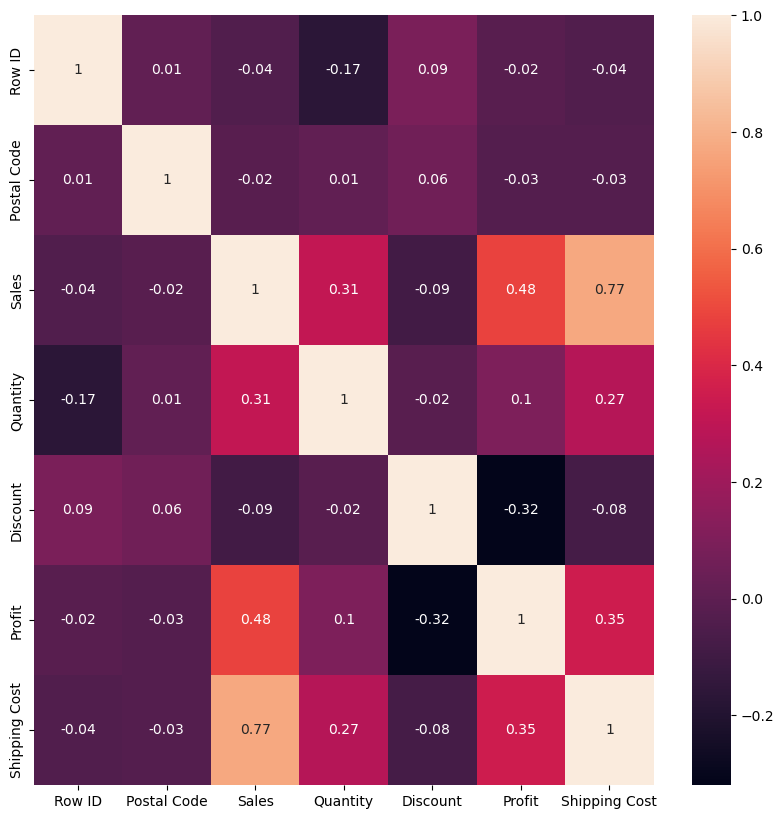

In [620]:
plt.figure(figsize=(10,10))             #Criando imagem e definindo tamanho
sns.heatmap(Base.corr().round(2), annot = True)

De acordo com a matriz de correlação verificamos que existe uma alta correlação negativa entre o lucro em percentual (Percent Profit) e os percentuais de descontos concedidos (Discount), ou seja, grandes descontos estão correlacionados a baixas margens de lucro e vice versa. 

Dentro da consultoria do analista de negócios seria interessante analisar se diminuir os descontos na expectativa de aumentar a margem de lucro geraria algum estremecimento comercial com os clientes.

## ANOVA

In [639]:
Base_anova = Base_price.filter(['Market','Percent Profit','Profit','Category','Sub-Category'])
Base_anova['Sub-Category'].unique()

array(['Storage', 'Supplies', 'Paper', 'Furnishings', 'Copiers',
       'Bookcases', 'Appliances', 'Art', 'Accessories', 'Binders',
       'Labels', 'Envelopes', 'Chairs', 'Machines', 'Tables', 'Phones',
       'Fasteners'], dtype=object)

In [622]:

Africa = Base_anova[Base_anova['Market'] == 'Africa']
Africa_p = list(Africa['Profit'])
Africa = list(Africa['Percent Profit'])
Apac = Base_anova[Base_anova['Market'] == 'APAC']
Apac_p = list(Apac['Profit'])
Apac = list(Apac['Percent Profit'])
Emea = Base_anova[Base_anova['Market'] == 'EMEA']
Emea_p = list(Emea['Profit'])
Emea = list(Emea['Percent Profit'])
Eu = Base_anova[Base_anova['Market'] == 'EU']
Eu_p = list(Eu['Profit'])
Eu = list(Eu['Percent Profit'])
Us = Base_anova[Base_anova['Market'] == 'US']
Us_p = list(Us['Profit'])
Us = list(Us['Percent Profit'])
Latam = Base_anova[Base_anova['Market'] == 'LATAM']
Latam_p = list(Latam['Profit'])
Latam = list(Latam['Percent Profit'])
Canada = Base_anova[Base_anova['Market'] == 'Canada']
Canada_p = list(Canada['Profit'])
Canada = list(Canada['Percent Profit'])


In [624]:
stats.f_oneway(Africa,Apac,Eu,Us,Latam,Canada)

F_onewayResult(statistic=281.9435206193925, pvalue=3.852411147223649e-298)

Anova do mercado por percentual de lucro mostra que existe diferença na média de percetual de lucro.

In [625]:
stats.f_oneway(Africa_p,Apac_p,Emea_p,Eu_p,Us_p,Latam_p,Canada_p)

F_onewayResult(statistic=28.07818874959562, pvalue=1.0834601137634787e-33)

Anova do mercado por lucro mostra que existe diferença na média de lucro.

### ANOVA subcategoria Tables

In [641]:
an_tables = Base_anova[Base_anova['Sub-Category'] == 'Tables']

Africa = an_tables[an_tables['Market'] == 'Africa']
Africa_p = list(Africa['Profit'])
Africa = list(Africa['Percent Profit'])
Apac = an_tables[an_tables['Market'] == 'APAC']
Apac_p = list(Apac['Profit'])
Apac = list(Apac['Percent Profit'])
Emea = an_tables[an_tables['Market'] == 'EMEA']
Emea_p = list(Emea['Profit'])
Emea = list(Emea['Percent Profit'])
Eu = an_tables[an_tables['Market'] == 'EU']
Eu_p = list(Eu['Profit'])
Eu = list(Eu['Percent Profit'])
Us = an_tables[an_tables['Market'] == 'US']
Us_p = list(Us['Profit'])
Us = list(Us['Percent Profit'])
Latam = an_tables[an_tables['Market'] == 'LATAM']
Latam_p = list(Latam['Profit'])
Latam = list(Latam['Percent Profit'])
Canada = an_tables[an_tables['Market'] == 'Canada']
Canada_p = list(Canada['Profit'])
Canada = list(Canada['Percent Profit'])

In [634]:
stats.f_oneway(Africa,Apac,Emea,Eu,Us,Latam,Canada)

F_onewayResult(statistic=4.272692732627731, pvalue=0.0002981402101853585)

Anova da subcategoria tables por percentual de lucro mostra que existe diferença de média no percentual de lucro por mercado.

In [635]:
stats.f_oneway(Africa_p,Apac_p,Emea_p,Eu_p,Us_p,Latam_p,Canada_p)

F_onewayResult(statistic=4.962231385839162, pvalue=5.2580933208190995e-05)

Anova da subcategoria tables por lucro mostra que existe diferença de média no lucro por mercado.

Então analisando as ANOVAs podemos identificar que há diferença de lucro e percentual de lucro entre os mercados por mais que os mercados vendam produtos iguais. Além disso podemos perceber também que há diferença quando a ANOVA é realizada apenas para a subcategoria tables o que pode significar que para cada mercado há uma forma de atuação diferenciada nesta subcategoria. 

## Conclusão

Após análise exploratória dos dados, pudemos identificar oportunidades de redução na oferta de produtos e oportunidade de direcionar o foco das vendas em determinados mercados.

Na parte de mercado, numa visão geral identificamos que APAC é o mercado mais lucrativo enquanto que o Canadá é o menos lucrativo. Entendemos que retirar as vendas do Canadá não é uma boa opção, pois apesar de ter um retorno menor, ainda é um mercado lucrativo de acordo com os dados. Um dos pontos que podemos destacar é que para aperfeiçoar as vendas por mercado seria necessário entender o perfil dos clientes para ofertar produtos que são mais rentáveis e que estejam alinhados com as tendências da região.

Ao olhar as subcategorias de produtos, identificamos que apenas a subcategoria "Tables" gerava um prejuízo. Como analistas, entendemos que retirar a subcategoria inteira como forma de potencializar o lucro não seja a melhor opção, pois pode haver outros produtos que sejam comprados em conjunto com as Mesas. Portanto, uma das alternativas trabalhadas foi a de retirar as mesas e demais produtos que de fato geravam prejuízos ao invés de retirar a oferta da subcategoria por completo. 

Embora as análises e alternativas levantadas sejam baseadas apenas nos dados históricos, uma das formas de aperfeiçoar as análises seria consultar um analista de negócio com o intuito de entender se tais alternativas são coerentes com o planejamento estratégico da empresa e com a inteligência comercial, pois existe diversos pontos que devem ser levados em consideração para a tomada de decisão, como por exemplo as tendências de mercado, a concorrência e demais fatores externos.